In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df = pd.read_csv('../../dataset/Heart_Disease_Prediction.csv')

In [50]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# EDA

## 데이터셋 기본 정보

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

- 결측치는 없는 것으로 보임
- 결측치 보간 방법
    - `df.fillna(method='bfill)` : 결측값 바로 아래값과 동일하게
    - `df.fillna(method='ffill)` : 결측값 바로 위 값과 동일하게
- 결측치 제거 방법
    - `df.dropna(axis=0)` : 결측치가 포함된 모든 행 제거
    - `df.dropna(axis=1)` : 결측치가 포함된 모든 열 제거


## 고윳값의 개수 확인

In [52]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

### 컬럼별로 수치형인지 범주형인지?

In [53]:
unknown_cols = list(df.columns)

In [54]:
unknown_cols.remove('Age')
unknown_cols.remove('Sex')
unknown_cols.remove('BP')
unknown_cols.remove('Heart Disease')

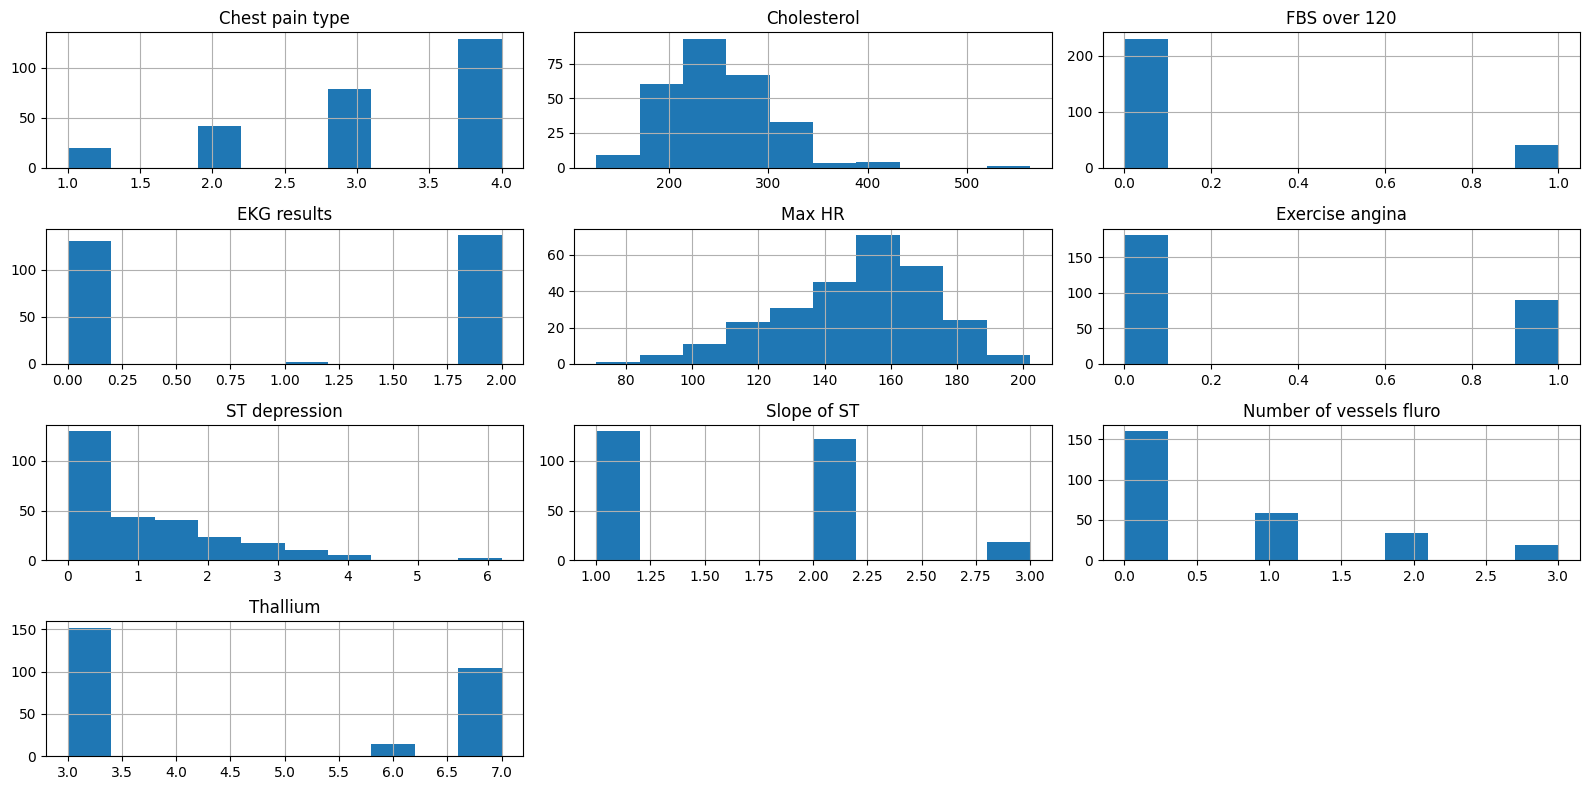

In [55]:
df[unknown_cols].hist(figsize=(16, 8))
plt.tight_layout()
plt.show()

- ST depression과 Max HR, Cholesterol은 수치형 변수로 판단

In [56]:
unknown_cols.remove('ST depression')
unknown_cols.remove('Max HR')
unknown_cols.remove('Cholesterol')

In [57]:
# 또한 성별은 범주형 번수로 인지
unknown_cols.append('Sex')

In [58]:
num_idx = df.drop(unknown_cols, axis=1).columns
cat_idx = df[unknown_cols].columns

In [59]:
num_idx

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease'], dtype='object')

In [60]:
cat_idx

Index(['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Sex'],
      dtype='object')

- 또한, 라벨값을 수치값으로 변환

In [61]:
df['Heart Disease'] = df['Heart Disease'].apply(lambda x : 1 if x == 'Presence' else 0)

In [62]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## 수치형 변수에 대한 상관관계 분석

Heart Disease    1.000000
ST depression    0.417967
Age              0.212322
BP               0.155383
Cholesterol      0.118021
Max HR          -0.418514
Name: Heart Disease, dtype: float64


<Axes: >

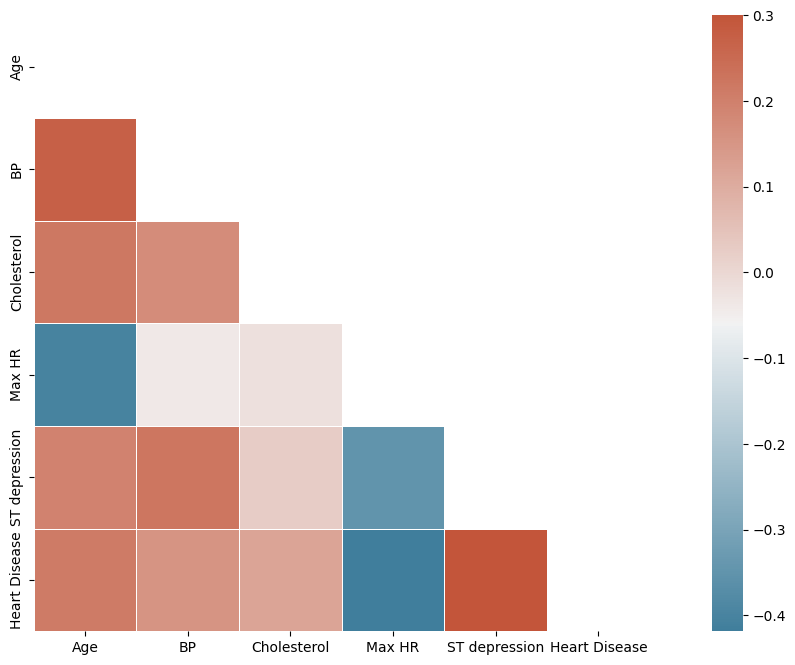

In [63]:
f, ax = plt.subplots(figsize=(16, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df[num_idx].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr['Heart Disease'].sort_values(ascending=False))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, linewidth=.5,
           square=True)

- 나이, 혈압, 콜레스테롤 수치와 크게 상관있어보이지는 않는다.
- Max HR(최대 심박수)이나 ST depression(심근 허혈?)이 오히려 조금 더 큰 상관관계를 갖는다.

In [73]:
# 우선 상관계수가 절댓값 0.3을 넘지 않는 것들을 모두 drop

num_drop = corr[corr['Heart Disease'].abs() < 0.3].index

In [75]:
num_drop

Index(['Age', 'BP', 'Cholesterol'], dtype='object')

In [112]:
num_idx = num_idx.drop(num_drop)

## 범주형 변수에 대한 Insight

In [113]:
df.head()

,Sex,Chest pain type,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1,4,0,2,109,0,2.4,2,3,3,1
1,0,3,0,2,160,0,1.6,2,0,7,0
2,1,2,0,0,141,0,0.3,1,0,7,1
3,1,4,0,0,105,1,0.2,2,1,7,0
4,0,2,0,2,121,1,0.2,1,1,3,0


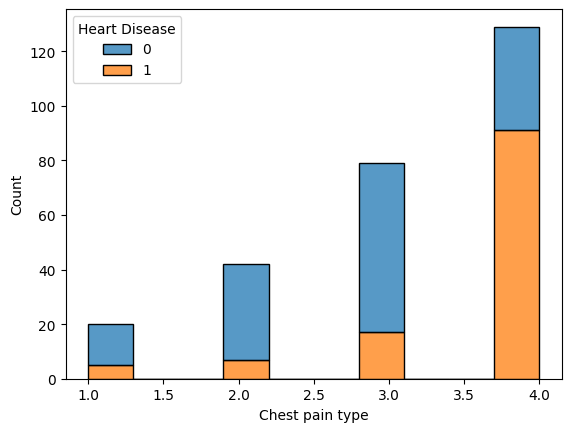

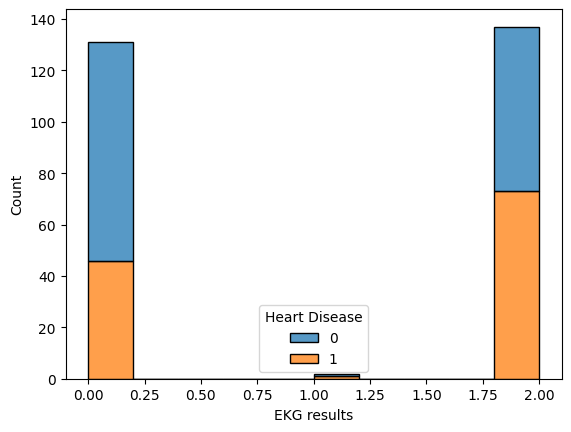

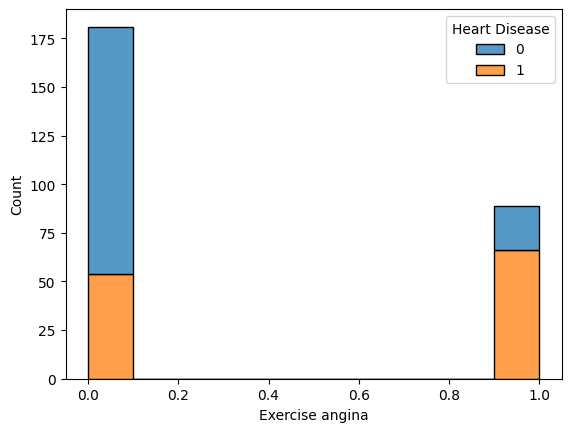

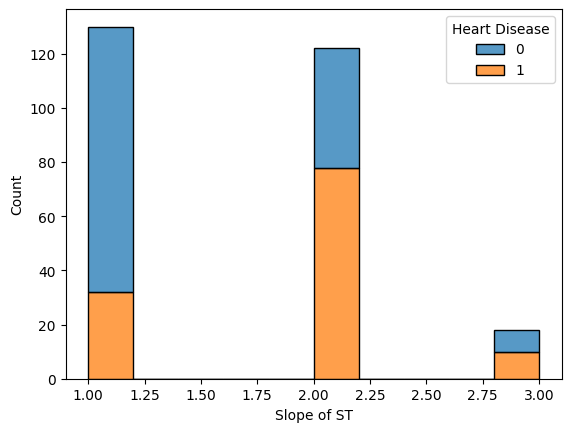

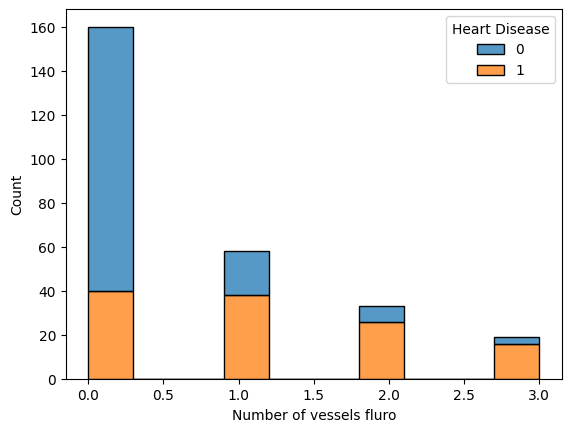

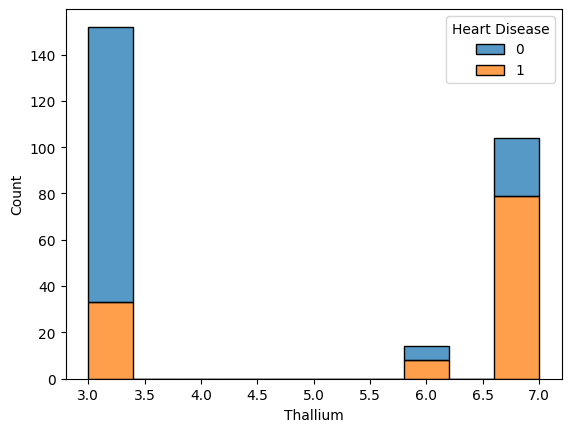

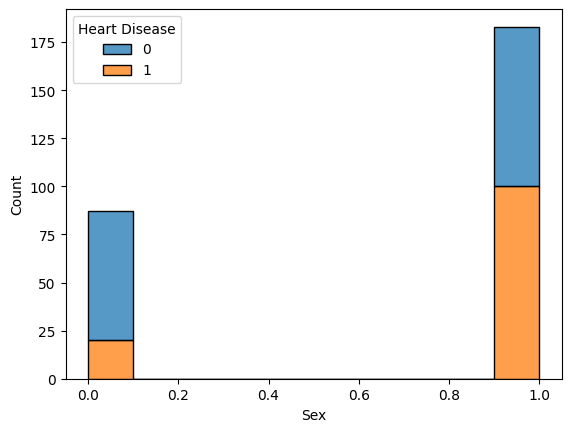

In [114]:
for i in cat_idx:
    sns.histplot(data=df, x=i, hue='Heart Disease', multiple='stack')
    plt.show()

In [115]:
# 분석결과 FBS over 120 컬럼에 대해, 범주별 심장질환 비율을 분석해봐야할 것 같음

FBS_g = df.groupby('FBS over 120')

In [116]:
FBS_g.get_group(0)['Heart Disease'].value_counts()

Heart Disease
0    127
1    103
Name: count, dtype: int64

In [117]:
FBS_g.get_group(1)['Heart Disease'].value_counts()

Heart Disease
0    23
1    17
Name: count, dtype: int64

In [118]:
FBS_g.get_group(0)['Heart Disease'].value_counts()[1]/ FBS_g.get_group(0)['Heart Disease'].value_counts().sum()

0.44782608695652176

In [119]:
FBS_g.get_group(1)['Heart Disease'].value_counts()[1]/ FBS_g.get_group(1)['Heart Disease'].value_counts().sum()

0.425

In [120]:
# 심장 질환 비율이 거의 유사한 것으로 보아, 큰 의미가 없는 것으로 판단하여 Drop
cat_idx = cat_idx.drop('FBS over 120')

KeyError: "['FBS over 120'] not found in axis"

## 데이터 전처리

In [153]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [122]:
num_idx = num_idx.drop('Heart Disease')

KeyError: "['Heart Disease'] not found in axis"

In [123]:
t = [('cat', OneHotEncoder(handle_unknown='ignore'), cat_idx), ('num', StandardScaler(), num_idx)]

In [124]:
col_transform = ColumnTransformer(transformers=t)

In [128]:
X = pd.concat([df[num_idx], df[cat_idx]], axis = 1)
y = df['Heart Disease']

In [129]:
X_std = col_transform.fit_transform(X)

In [132]:
X_std.shape, y.shape

((270, 23), (270,))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# 모델링

In [133]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
models = {
    
    'XGBClassifier' : (XGBClassifier(), {
        'n_estimators' : [5, 100],
        'max_depth' : [2, 20],
#         'min_samples_split' : [5, 100]
    }),
    'RandomForestClassifier' : (RandomForestClassifier(),{
        
        'n_estimators' : [5, 100],
        'max_depth' : [2, 20],
        'min_samples_split' : [5, 100]
    }),
    'GradientBoostingClassifier' : (GradientBoostingClassifier(), {
        'n_estimators' : [5, 100],
        'max_depth' : [2, 20],
        'min_samples_split' : [5, 100]
    })   
}

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
model_results = []
voting_models = []

In [154]:
for model_name, (model, param_grid) in models.items():
    print(f'Start {model_name} Training..')
    search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    best_params = search.best_params_
    
    print(f"Best Parameters: {best_params}")
    
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'f1 score: {f1}')
    print(f'accuracy score: {accuracy}')
    
    voting_models.append((model_name, model))

Start XGBClassifier Training..
Best Parameters: {'max_depth': 2, 'n_estimators': 5}
f1 score: 0.6842105263157895
accuracy score: 0.7777777777777778
Start RandomForestClassifier Training..
Best Parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
f1 score: 0.7777777777777778
accuracy score: 0.8518518518518519
Start GradientBoostingClassifier Training..
Best Parameters: {'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 100}
f1 score: 0.7692307692307693
accuracy score: 0.8333333333333334


In [155]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(voting_models, voting='soft')

In [156]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier())],
                 voting='soft')

In [159]:
y_pred = vc.predict(X_test)

In [160]:
f1_score(y_test, y_pred)

0.8292682926829268

In [161]:
accuracy_score(y_test, y_pred)

0.8703703703703703

# Results

- voting으로 한결과가 제일 우수